In [15]:
from octis.models.LDA import LDA
from octis.models.NeuralLDA import NeuralLDA
from octis.models.ProdLDA import ProdLDA
from octis.models.HDP import HDP
from octis.models.LDA_tomopy import LDA_tomopy
from octis.models.NMF import NMF
from octis.dataset.dataset import Dataset
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

In [26]:
# our dataset "U.S. Patents.csv" that is renamed to corpus.tsv
#Dataset without preprocessing 
 
dataset = Dataset()
dataset.load_custom_dataset_from_folder("C:/Users/admin/Topic-Modeling/dataset")

In [33]:
from octis.optimization.optimizer import Optimizer

model = LDA(num_topics=25)

npmi = Coherence(texts=dataset.get_corpus())

search_space = {
"alpha": Real(low=0.001, high=5.0),
"eta": Real(low=0.001, high=5.0)
}

optimization_runs=30
model_runs=1

optimizer=Optimizer()
optimization_result = optimizer.optimize(
    model, dataset, npmi, search_space, number_of_call=optimization_runs, 
    model_runs=model_runs, save_models=True, 
    extra_metrics=None, # to keep track of other metrics
    save_path='C:/Users/admin/Topic-Modeling/dataset/results')


Current call:  0
Current call:  1
Current call:  2
Current call:  3
Current call:  4
Current call:  5
Current call:  6
Current call:  7
Current call:  8
Current call:  9
Current call:  10
Current call:  11
Current call:  12
Current call:  13
Current call:  14
Current call:  15
Current call:  16
Current call:  17
Current call:  18
Current call:  19
Current call:  20
Current call:  21
Current call:  22
Current call:  23
Current call:  24
Current call:  25
Current call:  26
Current call:  27
Current call:  28
Current call:  29


In [46]:
#optimization_result.save_to_csv("results_lda.csv")

In [50]:
import json
res = json.load(open("C:/Users/admin/Topic-Modeling/dataset/results/result-lda.json",'r'))
res.keys()

dict_keys(['dataset_name', 'dataset_path', 'is_cached', 'kernel', 'acq_func', 'surrogate_model', 'optimization_type', 'model_runs', 'save_models', 'save_step', 'save_name', 'save_path', 'early_stop', 'early_step', 'plot_model', 'plot_best_seen', 'plot_name', 'log_scale_plot', 'search_space', 'model_name', 'model_attributes', 'use_partitioning', 'metric_name', 'extra_metric_names', 'metric_attributes', 'extra_metric_attributes', 'current_call', 'number_of_call', 'random_state', 'x0', 'y0', 'n_random_starts', 'initial_point_generator', 'topk', 'time_eval', 'dict_model_runs', 'f_val', 'x_iters'])

In [51]:
res['x_iters']['alpha']

[2.43075056778473,
 2.964630246506867,
 4.277869229270085,
 4.124810985717318,
 3.0907360552309604,
 2.0493847193483052,
 1.605611750925235,
 3.3442921604146236,
 4.162560187140051,
 4.590206089658596,
 3.845459723579644,
 3.6197177196189094,
 3.3718798821241722,
 3.4923513548595686,
 3.3643941608084953,
 3.4257803169515864,
 3.3951196245691007,
 3.399476337719672,
 3.4120631797271503,
 4.050787961657906,
 4.490197206246457,
 4.996308771283075,
 3.414286055724979,
 4.092678644239964,
 3.013648035161445,
 4.255540628061432,
 4.730466056961888,
 4.584572281983669,
 4.371715274952334,
 3.999737084163556]

Text(0, 0.5, 'NPMI')

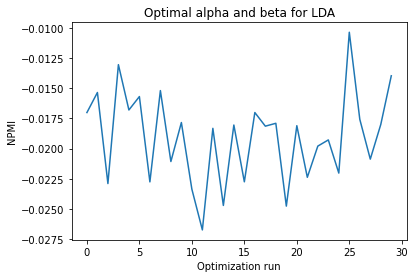

In [61]:
import matplotlib.pyplot as plt

plt.plot(res["f_val"])
plt.title('Optimal alpha and beta for LDA')
plt.xlabel('Optimization run')
plt.ylabel('NPMI')

In [57]:

import numpy as np  
import pandas as pd

parameter = pd.read_csv('C:/Users/admin/Topic-Modeling/dataset/results/result-lda.csv')
parameter=parameter[["f_val","x_iters__alpha","x_iters__eta"]]
parameter = parameter.sort_values(by=['f_val'], ascending=False)
parameter

,f_val,x_iters__alpha,x_iters__eta
25,-0.010366,4.255541,4.057614
3,-0.013049,4.124811,4.059226
29,-0.013971,3.999737,4.063865
7,-0.015196,3.344292,3.965610
1,-0.015354,2.964630,1.919866
5,-0.015690,2.049385,2.843887
4,-0.016801,3.090736,4.235821
16,-0.017013,3.395120,2.700880
0,-0.017015,2.430751,3.428876
26,-0.017575,4.730466,4.055506


In [4]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [58]:
#Dataset with preprocessing
import os
import string
from octis.preprocessing.preprocessing import Preprocessing
os.chdir(os.path.pardir)

# Initialize preprocessing
preprocessor = Preprocessing(vocabulary=None, max_features=None,
                             remove_punctuation=True, punctuation=string.punctuation,
                             lemmatize=True, stopword_list='english',
                             min_chars=1, min_words_docs=0)

# preprocess
Preprocesed_dataset = preprocessor.preprocess_dataset(documents_path=r'C:\Users\admin\Topic-Modeling\dataset\U.S. Patents.csv')

created vocab
46546


In [ ]:
##############  LDA  ######################################

In [62]:
Pre_lda_model = LDA(num_topics=25,alpha=4,eta=4)  # Create model
trained_Pre_Lda_model = Pre_lda_model.train_model(Preprocesed_dataset) # Train the model

# Initialize metric
npmi_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_v')

umass_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='u_mass')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_Pre_Lda_model)
print("Topic diversity with Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_Pre_Lda_model)
print("npmi_Coherence with Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_Pre_Lda_model)
print("cv_Coherence with Preprocessing: "+str(CV_score))

umass_score = umass_Coherence.score(trained_Pre_Lda_model)
print("umass_Coherence with Preprocessing: "+str(umass_score))

Topic diversity with Preprocessing: 0.208
npmi_Coherence with Preprocessing: 0.011059150417424368
cv_Coherence with Preprocessing: 0.3738534161377519
umass_Coherence with Preprocessing: -0.9737610921701098


In [ ]:
############## Default LDA  ######################################

In [63]:
lda_model = LDA(num_topics=25,alpha=4,eta=4)  # Create model
trained_Lda_model = lda_model.train_model(Preprocesed_dataset) # Train the model

# Initialize metric
npmi_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_v')

umass_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='u_mass')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_Lda_model)
print("Topic diversity with Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_Lda_model)
print("npmi_Coherence with Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_Lda_model)
print("cv_Coherence with Preprocessing: "+str(CV_score))

umass_score = umass_Coherence.score(trained_Lda_model)
print("umass_Coherence with Preprocessing: "+str(umass_score))

Topic diversity with Preprocessing: 0.184
npmi_Coherence with Preprocessing: 0.0018848619192362455
cv_Coherence with Preprocessing: 0.3613702621754562
umass_Coherence with Preprocessing: -1.0890041522189338


In [64]:
##################### NeuralLDA #############################

In [65]:
NeuralLDA_model = NeuralLDA(num_topics=25)
trained_NeuralLDA_model = NeuralLDA_model.train_model(Preprocesed_dataset)

# Initialize metric
npmi_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_v')

umass_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='u_mass')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_NeuralLDA_model)
print("Topic diversity with Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_NeuralLDA_model)
print("npmi_Coherence with Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_NeuralLDA_model)
print("cv_Coherence with Preprocessing: "+str(CV_score))

umass_score = umass_Coherence.score(trained_NeuralLDA_model)
print("umass_Coherence with Preprocessing: "+str(umass_score))

Epoch: [1/100]	Samples: [5583/558300]	Train Loss: 5977.603059790883	Time: 0:00:09.543221
Epoch: [1/100]	Samples: [1197/119700]	Validation Loss: 5613.176169590643	Time: 0:00:00.752532
Epoch: [2/100]	Samples: [11166/558300]	Train Loss: 5625.036055324198	Time: 0:00:08.192044
Epoch: [2/100]	Samples: [1197/119700]	Validation Loss: 5479.247572055137	Time: 0:00:00.616588
Epoch: [3/100]	Samples: [16749/558300]	Train Loss: 5509.47719360111	Time: 0:00:07.303319
Epoch: [3/100]	Samples: [1197/119700]	Validation Loss: 5403.9944000626565	Time: 0:00:00.567834
Epoch: [4/100]	Samples: [22332/558300]	Train Loss: 5424.0144439593405	Time: 0:00:07.068310
Epoch: [4/100]	Samples: [1197/119700]	Validation Loss: 5347.779788011696	Time: 0:00:00.602784
Epoch: [5/100]	Samples: [27915/558300]	Train Loss: 5359.2145715789	Time: 0:00:07.599572
Epoch: [5/100]	Samples: [1197/119700]	Validation Loss: 5385.743525480368	Time: 0:00:00.623519
Epoch: [6/100]	Samples: [33498/558300]	Train Loss: 5330.251809343095	Time: 0:00:09

In [66]:
################## ProdLDA  ###############################

In [68]:
ProdLDA_model = ProdLDA(num_topics=25)  # Create model
trained_ProdLDA_model = ProdLDA_model.train_model(Preprocesed_dataset) # Train the model

# Initialize metric
npmi_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_v')

umass_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='u_mass')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_ProdLDA_model)
print("Topic diversity with Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_ProdLDA_model)
print("npmi_Coherence with Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_ProdLDA_model)
print("cv_Coherence with Preprocessing: "+str(CV_score))

umass_score = umass_Coherence.score(trained_ProdLDA_model)
print("umass_Coherence with Preprocessing: "+str(umass_score))

Epoch: [1/100]	Samples: [5583/558300]	Train Loss: 6264.081975976178	Time: 0:00:09.231714
Epoch: [1/100]	Samples: [1197/119700]	Validation Loss: 6116.140272556391	Time: 0:00:00.765675
Epoch: [2/100]	Samples: [11166/558300]	Train Loss: 6036.259155863783	Time: 0:00:09.231654
Epoch: [2/100]	Samples: [1197/119700]	Validation Loss: 6054.640951336675	Time: 0:00:00.842790
Epoch: [3/100]	Samples: [16749/558300]	Train Loss: 5957.903396751299	Time: 0:00:08.873875
Epoch: [3/100]	Samples: [1197/119700]	Validation Loss: 6042.394710735171	Time: 0:00:00.664478
Epoch: [4/100]	Samples: [22332/558300]	Train Loss: 5906.923953015852	Time: 0:00:08.096221
Epoch: [4/100]	Samples: [1197/119700]	Validation Loss: 6046.334220969089	Time: 0:00:00.665090
Epoch: [5/100]	Samples: [27915/558300]	Train Loss: 5863.806748723804	Time: 0:00:08.203431
Epoch: [5/100]	Samples: [1197/119700]	Validation Loss: 6114.917606516291	Time: 0:00:00.683972
Epoch: [6/100]	Samples: [33498/558300]	Train Loss: 5842.324174670875	Time: 0:00:0

In [69]:
################### NMF #################################

In [70]:
Pre_NMF_model = NMF(num_topics=25)  # Create model
trained_Pre_NMF_model = Pre_NMF_model.train_model(Preprocesed_dataset) # Train the model

# Initialize metric
npmi_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_npmi') 

cv_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='c_v')

umass_Coherence = Coherence(texts=Preprocesed_dataset.get_corpus(), topk=10, measure='u_mass')

topic_diversity = TopicDiversity(topk=10)

# Retrieve metrics score
topic_diversity_score = topic_diversity.score(trained_Pre_NMF_model)
print("Topic diversity with Preprocessing: "+str(topic_diversity_score))

npmi_score = npmi_Coherence.score(trained_Pre_NMF_model)
print("npmi_Coherence with Preprocessing: "+str(npmi_score))

CV_score = cv_Coherence.score(trained_Pre_NMF_model)
print("cv_Coherence with Preprocessing: "+str(CV_score))

umass_score = umass_Coherence.score(trained_Pre_NMF_model)
print("umass_Coherence with Preprocessing: "+str(umass_score))

Topic diversity with Preprocessing: 0.448
npmi_Coherence with Preprocessing: 0.12906142812440502
cv_Coherence with Preprocessing: 0.52788290362679
umass_Coherence with Preprocessing: -2.3602788740069696
